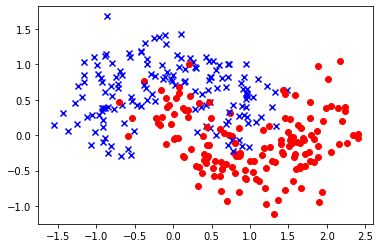

In [26]:
from sklearn import datasets
import matplotlib.pyplot as plt
import make_graph as g

np.random.seed(123)
N = 300
x, t = datasets.make_moons(N, noise = 0.3)

for i in range(N):
    if t[i] == 1:
        plt.scatter(x[i, 0], x[i, 1], color = "red", marker = "o")
    else:
        plt.scatter(x[i, 0], x[i, 1], color = "blue", marker = "x")
plt.show()

In [25]:
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



#多層パーセプトロン
class MLP(object):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        
        self.l1 = Layer(input_dim = input_dim,
                       output_dim = hidden_dim,
                       activation = sigmoid,
                       dactivation = dsigmoid)
        
        self.l2 = Layer(input_dim = hidden_dim,
                       output_dim = output_dim,
                       activation = sigmoid,
                       dactivation = dsigmoid)
        
        self.layers = [self.l1, self.l2]
        
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        h = self.l1(x)
        y = self.l2(h)
        return y

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))
        
        
        
class Layer(object):
    #層間の結合
    
    def __init__(self, input_dim, output_dim, activation, dactivation):
        self.W = np.random.normal(size = (input_dim, output_dim))
        self.b = np.zeros(output_dim)
        
        self.activation = activation
        self.dactivation = dactivation
        
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        self._input = x
        self._pre_activation = np.matmul(x, self.W) + self.b
        return self.activation(self._pre_activation)
    
    def backward(self, delta, W):
        delta = self.dactivation(self._pre_activation) * np.matmul(delta, W.T)
        return delta
    
    def compute_gradients(self, delta):
        dW = np.matmul(self._input.T, delta)
        db = np.matmul(np.ones(self._input.shape[0]), delta)
        return dW, db
    
    
    
#データの準備
np.random.seed(123)
N = 300
x, t = datasets.make_moons(N, noise = 0.3)
t = t.reshape(N, 1)

x_train, x_test, t_train, t_test = \
    train_test_split(x, t, test_size = 0.2)



#モデルの構築
model = MLP(2, 3, 1)



#モデルの学習
def compute_loss(t, y):
    return (-t * np.log(y) - (1 - t) * np.log(1 - y)).sum()

def train_step(x, t):
    y = model(x)
    for i, layer in enumerate(model.layers[::-1]):
        if i == 0:
            delta = y - t
        else:
            delta = layer.backward(delta, W)
        
        dW, db = layer.compute_gradients(delta)
        layer.W = layer.W - 0.1 * dW
        layer.b = layer.b - 0.1 * db
        
        W = layer.W
    
    loss = compute_loss(t, y)
    return loss


epochs = 100
batch_size = 30
n_batches = x_train.shape[0] // batch_size


for epoch in range(epochs):
    train_loss = 0.
    x_, t_ = shuffle(x_train, t_train)
    
    for n_batch in range(n_batches):
        start = n_batch * batch_size
        end = start + batch_size
        
        train_loss += train_step(x_[start : end], t_[start : end])
        
    if epoch % 10 == 0 or epoch == epochs - 1:
        print("epoch: {}, loss: {:.3f}".format(epoch + 1, train_loss))
        
        

#モデルの評価
preds = model(x_test) > 0.5
acc = accuracy_score(t_test, preds)
print("acc.: {:.3f}".format(acc))





epoch: 1, loss: 143.587
epoch: 11, loss: 100.656
epoch: 21, loss: 97.881
epoch: 31, loss: 93.624
epoch: 41, loss: 90.038
epoch: 51, loss: 94.091
epoch: 61, loss: 80.874
epoch: 71, loss: 66.254
epoch: 81, loss: 71.314
epoch: 91, loss: 61.582
epoch: 100, loss: 58.968
acc.: 0.933


<class 'object'>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
